In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:
import sys
sys.path.append('../')
años=["2020-21","2019-20","2018-19","2017-18","2015-16","2014-15","2013-14","2012-13","2011-12","2010-11"]

#primero sacamos todos los datos, los partidos entre equipos que sean de la seleccion, cojo los datos de goles, la lista de equipos, recorro los partidos de cada equipo y creo 
#dos arrays, la entrada son los goles de cada [1L,2V] y la salida el resultado del partido [n,m], luego se lo paso a la red neuronal para que pruebe
listaEquipos = pd.read_csv ('../docs/equipo.csv')
equipos=list(listaEquipos['Equipo'])
partidos=pd.DataFrame(columns=['Local','GolesLocal','GolesVisitante','Visitante'])
for año in años:
    datos=pd.read_csv(f'../Datos/Champions/resultados{año}.csv')
    for i in range(len(datos)):
        if str(datos.iloc[i]['Local']) in equipos:
            if datos.iloc[i]['Visitante'] in equipos:
                partidos=partidos.append({'Local':str(datos.iloc[i]['Local']),'GolesLocal':int(datos.iloc[i]['GolesLocal']),'GolesVisitante':int(datos.iloc[i]['GolesVisitante']),'Visitante':str(datos.iloc[i]['Visitante'])},ignore_index=True)


In [8]:
resultado=[]
entrada=[]
df1=pd.read_csv ('../golesChampions.csv')
df2=pd.read_csv ('../golesLiga.csv')
df1= df1.set_index('Equipo')
df2= df2.set_index('Equipo')
for i in range(len(partidos)):
    local=partidos.iloc[i]['Local']
    visitante=partidos.iloc[i]['Visitante']
    datosLocal=[df1['golesLocal'][local],df1['golesRecibidosLocal'][local],df1['golesVisitante'][local],df1['golesRecibidosVisitante'][local],df2['golesLocal'][local],df2['golesRecibidosLocal'][local],df2['golesVisitante'][local],df2['golesRecibidosVisitante'][local]]
    datosVisitante=[df1['golesLocal'][visitante],df1['golesRecibidosLocal'][visitante],df1['golesVisitante'][visitante],df1['golesRecibidosVisitante'][visitante],df2['golesLocal'][visitante],df2['golesRecibidosLocal'][visitante],df2['golesVisitante'][visitante],df2['golesRecibidosVisitante'][visitante]]
    entrada.append([datosLocal[0],datosLocal[1],datosLocal[2],datosLocal[3],datosLocal[4],datosLocal[5],datosLocal[6],datosLocal[7],datosVisitante[0],datosVisitante[1],datosVisitante[2],datosVisitante[3],datosVisitante[4],datosVisitante[5],datosVisitante[6],datosVisitante[7]])
    resultado.append([partidos.iloc[i]['GolesLocal'],partidos.iloc[i]['GolesVisitante']])


In [9]:
tf.keras.layers.Activation('relu')
oculta1=tf.keras.layers.Dense(units=20,input_shape=[16])
oculta2=tf.keras.layers.Dense(units=20)
oculta3=tf.keras.layers.Dense(units=20)
oculta4=tf.keras.layers.Dense(units=20)
salida=tf.keras.layers.Dense(units=2)
modelo=tf.keras.Sequential([oculta1,oculta2,oculta3,oculta4,salida])

In [10]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [11]:

print("Comenzando entrenamiento...")
historial=modelo.fit(entrada,resultado,epochs=500,verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


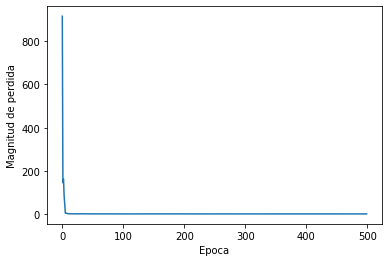

In [12]:
plt.xlabel('Epoca')
plt.ylabel('Magnitud de perdida')
plt.plot(historial.history['loss'])

In [13]:

print("Hagamos una predicción!")
print('Partido entre Atalanta y Villarreal')
prueba=[1.8333333333333333,0.6666666666666666,1.1666666666666667,1.5,1.631578947368421,1.5263157894736843,1.7894736842105263,1.0,1.0,1.2222222222222223,0.5555555555555556,1.2222222222222223,2.1052631578947367,0.9473684210526315,1.2105263157894737,1.0]
solucion=modelo.predict([prueba])
print("El resultado es {}".format(solucion))
a=round(solucion[0][0],0)
b=round(solucion[0][1],0)
print(f'El resultado es {a}-{b}')

Hagamos una predicción!
Partido entre Atalanta y Villarreal
1/1 [==============================] - 1s 1s/step
El resultado es [[1.4052168  0.94405067]]
El resultado es 1.0-1.0


In [14]:
print("Hagamos una predicción!")
print('Partido entre Villarreal y Atalanta')
prueba=[1.0,1.2222222222222223,0.5555555555555556,1.2222222222222223,2.1052631578947367,0.9473684210526315,1.2105263157894737,1.0,1.8333333333333333,0.6666666666666666,1.1666666666666667,1.5,1.631578947368421,1.5263157894736843,1.7894736842105263,1.0]
solucion=modelo.predict([prueba])
print("El resultado es {}".format(solucion))
a=round(solucion[0][0],0)
b=round(solucion[0][1],0)
print(f'El resultado es {a}-{b}')

Hagamos una predicción!
Partido entre Villarreal y Atalanta
1/1 [==============================] - 0s 196ms/step
El resultado es [[0.9695231 1.583794 ]]
El resultado es 1.0-2.0


In [15]:
print("Hagamos una predicción!")
print('Partido entre Barcelona y Bayern')
prueba=[2.4126984126984126,0.6825396825396826,1.5714285714285714,1.0317460317460319,1.9473684210526316,1.0,1.631578947368421,1.0,2.3684210526315788,0.631578947368421,1.3333333333333333,1.5614035087719298,2.823529411764706,0.8823529411764706,2.8823529411764706,1.2941176470588236]
solucion=modelo.predict([prueba])
print("El resultado es {}".format(solucion))
a=round(solucion[0][0],0)
b=round(solucion[0][1],0)
print(f'El resultado es {a}-{b}')

Hagamos una predicción!
Partido entre Barcelona y Bayern
1/1 [==============================] - 0s 172ms/step
El resultado es [[2.087597 1.223537]]
El resultado es 2.0-1.0
